In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd
import os
import getdist
from getdist import plots, MCSamples
import sacc
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 18
plt.rc('legend',fontsize=14)

# Nz's cov

In [2]:
def make_sym(A):
    return np.maximum(A, A.transpose())

def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)

In [25]:
covs = np.load("/home/jaimerz/Glamdring/LimberJack.jl/data/DESY1/nzs/DESwl_final_HSC_covNzMarg_p5.0_diag4.0.npz")
s = sacc.Sacc().load_fits("/home/jaimerz/Glamdring/LimberJack.jl/data/DESY1/nzs/DESwl_final_HSC_cls_NzMarg_cov_p5.0_area2_diag4.0.fits")
z_DESwl__0_e = s.tracers["DESwl__0"].z
dndz_DESwl__0_e = (s.tracers["DESwl__0"].nz*np.mean(np.diff(s.tracers["DESwl__0"].z)))
z_DESwl__1_e = s.tracers["DESwl__1"].z
dndz_DESwl__1_e = (s.tracers["DESwl__1"].nz*np.mean(np.diff(s.tracers["DESwl__1"].z)))
z_DESwl__2_e = s.tracers["DESwl__2"].z
dndz_DESwl__2_e = (s.tracers["DESwl__2"].nz*np.mean(np.diff(s.tracers["DESwl__2"].z)))
z_DESwl__3_e = s.tracers["DESwl__3"].z
dndz_DESwl__3_e = (s.tracers["DESwl__3"].nz*np.mean(np.diff(s.tracers["DESwl__3"].z)))

nz_DESwl__0_e = (z_DESwl__0_e, dndz_DESwl__0_e)
nz_DESwl__1_e = (z_DESwl__1_e, dndz_DESwl__1_e)
nz_DESwl__2_e = (z_DESwl__2_e, dndz_DESwl__2_e)
nz_DESwl__3_e = (z_DESwl__3_e, dndz_DESwl__3_e)

In [26]:
nzs_covs = {"DESY1wl__0": make_sym(covs['cov_nz'][:100][:, :100]), 
            "DESY1wl__1": make_sym(covs['cov_nz'][100:200][:, 100:200]),
            "DESY1wl__2": make_sym(covs['cov_nz'][200:300][:, 200:300]),
            "DESY1wl__3": make_sym(covs['cov_nz'][300:400][:, 300:400])}

/tmp/ipykernel_250/95440055.py:7: RuntimeWarning: divide by zero encountered in log
  im = axis[i].imshow(np.log(abs(nzs_covs[cov])),


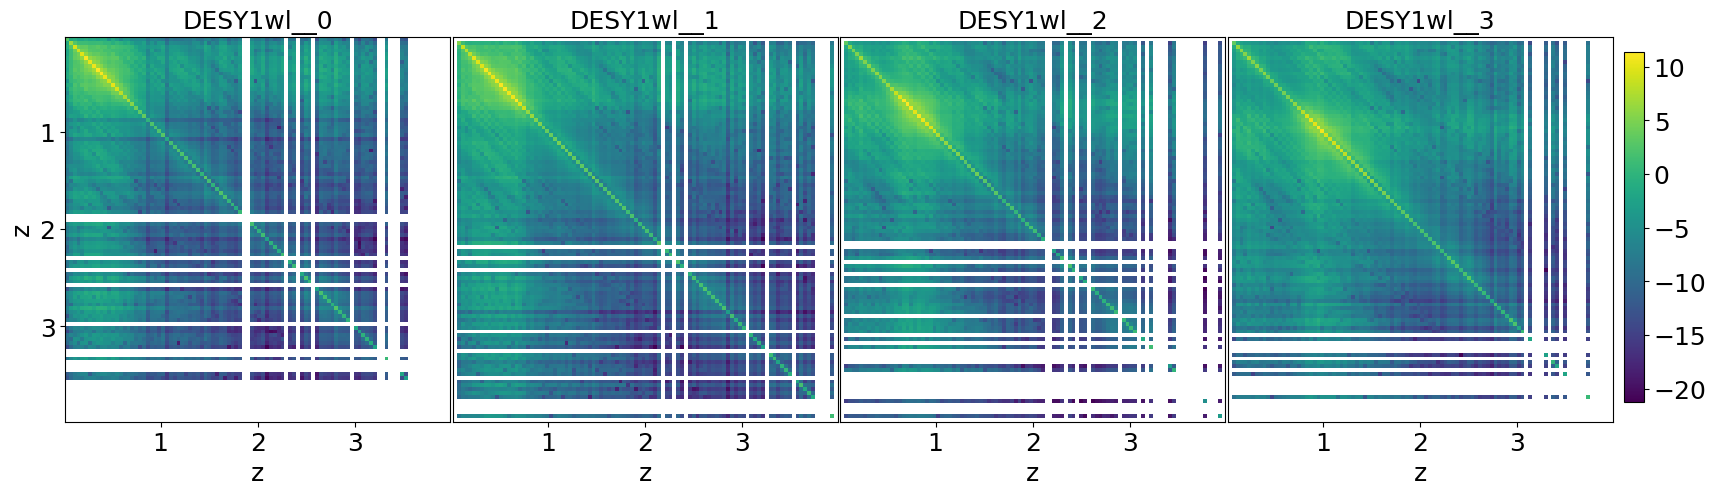

In [27]:
figure, axis = plt.subplots(1, 4, figsize=(20,5))
figure.subplots_adjust(wspace=0)
for i in range(0, len(nzs_covs.keys())):
    cov = list(nzs_covs.keys())[i]
    z = nz_DESwl__0_e[0]
    zmin, zmax = z[0], z[99]
    im = axis[i].imshow(np.log(abs(nzs_covs[cov])),
                        extent=[zmin, zmax, zmax, zmin])
    axis[i].set_title(cov)
    if i > 0:
        axis[i].set_yticks([])
    else:
        axis[i].set_ylabel("z")
    axis[i].set_xlabel("z")
cbar_ax = figure.add_axes([0.905, 0.15, 0.01, 0.7])
figure.colorbar(im, cax=cbar_ax)
plt.savefig('/mnt/c/Users/Jaime/Desktop/Nz_paper_plots/original_covs.pdf', bbox_inches='tight',  pad_inches=0)

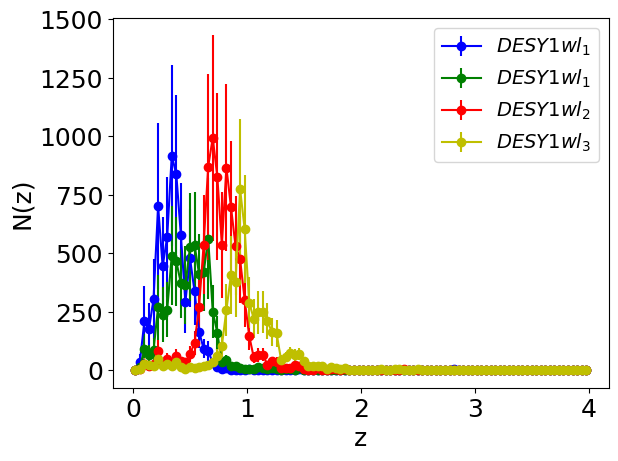

In [28]:
plt.errorbar(nz_DESwl__0_e[0], nz_DESwl__0_e[1],
             yerr=np.sqrt(np.diag(nzs_covs["DESY1wl__0"])),
             fmt='bo-', label="$DESY1wl_1$")

plt.errorbar(nz_DESwl__1_e[0], nz_DESwl__1_e[1],
             yerr=np.sqrt(np.diag(nzs_covs["DESY1wl__1"])),
             fmt='go-', label="$DESY1wl_1$")

plt.errorbar(nz_DESwl__2_e[0],  nz_DESwl__2_e[1],
             yerr=np.sqrt(np.diag(nzs_covs["DESY1wl__2"])),
             fmt='ro-', label="$DESY1wl_2$")

plt.errorbar(nz_DESwl__3_e[0], nz_DESwl__3_e[1],
             yerr=np.sqrt(np.diag(nzs_covs["DESY1wl__3"])),
             fmt='yo-', label="$DESY1wl_3$")

plt.xlabel("z")
plt.ylabel("N(z)")
plt.legend();

plt.savefig('/mnt/c/Users/Jaime/Desktop/Nz_paper_plots/binned_covs.pdf', bbox_inches='tight',  pad_inches=0)

In [30]:
np.savez("../../data/DESY1/nzs/nz_DESwl__0.npz",
         z=nz_DESwl__0_e[0], dndz=nz_DESwl__0_e[1], cov=nzs_covs["DESY1wl__0"])

np.savez("../../data/DESY1/nzs/nz_DESwl__1.npz",
         z=nz_DESwl__1_e[0], dndz=nz_DESwl__1_e[1], cov=nzs_covs["DESY1wl__1"])
np.savez("../../data/DESY1/nzs/nz_DESwl__2.npz",
         z=nz_DESwl__2_e[0], dndz=nz_DESwl__2_e[1], cov=nzs_covs["DESY1wl__2"])

np.savez("../../data/DESY1/nzs/nz_DESwl__3.npz",
         z=nz_DESwl__3_e[0], dndz=nz_DESwl__3_e[1], cov=nzs_covs["DESY1wl__3"])

## Binning

In [31]:
norm_0 = np.sum(dndz_DESwl__0_e)
norm_1 = np.sum(dndz_DESwl__1_e)
norm_2 = np.sum(dndz_DESwl__2_e)
norm_3 = np.sum(dndz_DESwl__3_e)

nz_DESwl__0_e = (z_DESwl__0_e[0:40], (dndz_DESwl__0_e/norm_0)[0:40])
nz_DESwl__1_e = (z_DESwl__1_e[1:41], (dndz_DESwl__1_e/norm_1)[1:41])
nz_DESwl__2_e = (z_DESwl__2_e[1:41], (dndz_DESwl__2_e/norm_2)[1:41])
nz_DESwl__3_e = (z_DESwl__3_e[1:41], (dndz_DESwl__3_e/norm_3)[1:41])

nzs_covs = {"DESY1wl__0": make_sym(covs['cov_nz'][:100][:, :100][:40][:,:40]/norm_0**2), 
            "DESY1wl__1": make_sym(covs['cov_nz'][100:200][:, 100:200][1:41][:,1:41]/norm_1**2),
            "DESY1wl__2": make_sym(covs['cov_nz'][200:300][:, 200:300][1:41][:,1:41]/norm_2**2),
            "DESY1wl__3": make_sym(covs['cov_nz'][300:400][:, 300:400][1:41][:,1:41]/norm_3**2)}

In [33]:
m = 40
#zs_k0_bins = np.mean(nz_DESwl__0_e[0][:m].reshape(m_bins, m // m_bins),1)
#zs_k1_bins = np.mean(nz_DESwl__1_e[0][:m].reshape(m_bins, m // m_bins),1)
#zs_k2_bins = np.mean(nz_DESwl__2_e[0][:m].reshape(m_bins, m // m_bins),1)
#zs_k3_bins = np.mean(nz_DESwl__3_e[0][:m].reshape(m_bins, m // m_bins),1)

#nz_k0_bins = np.mean(nz_DESwl__0_e[1][:m].reshape(m_bins, m // m_bins),1)
#nz_k1_bins = np.mean(nz_DESwl__1_e[1][:m].reshape(m_bins, m // m_bins),1)
#nz_k2_bins = np.mean(nz_DESwl__2_e[1][:m].reshape(m_bins, m // m_bins),1)
#nz_k3_bins = np.mean(nz_DESwl__3_e[1][:m].reshape(m_bins, m // m_bins),1)

#cov_k0_bins = (m_bins/m)*nzs_covs["DESY1wl__0"][:m][:,:m].reshape(m_bins, m // m_bins, m_bins, m // m_bins).mean(3).mean(1)
#cov_k1_bins = (m_bins/m)*nzs_covs["DESY1wl__1"][:m][:,:m].reshape(m_bins, m // m_bins, m_bins, m // m_bins).mean(3).mean(1)
#cov_k2_bins = (m_bins/m)*nzs_covs["DESY1wl__2"][:m][:,:m].reshape(m_bins, m // m_bins, m_bins, m // m_bins).mean(3).mean(1)
#cov_k3_bins = (m_bins/m)*nzs_covs["DESY1wl__3"][:m][:,:m].reshape(m_bins, m // m_bins, m_bins, m // m_bins).mean(3).mean(1)

#corr_k0_bins = cov_k0_bins / np.outer(np.sqrt(np.diag(cov_k0_bins)), np.sqrt(np.diag(cov_k0_bins)))
#corr_k1_bins = cov_k1_bins / np.outer(np.sqrt(np.diag(cov_k1_bins)), np.sqrt(np.diag(cov_k1_bins)))
#corr_k2_bins = cov_k2_bins / np.outer(np.sqrt(np.diag(cov_k2_bins)), np.sqrt(np.diag(cov_k2_bins)))
#corr_k3_bins = cov_k3_bins / np.outer(np.sqrt(np.diag(cov_k3_bins)), np.sqrt(np.diag(cov_k3_bins)))

np.savez("../../data/DESY1/nzs/nz_DESwl__0.npz".format(m),
         z=nz_DESwl__0_e[0], dndz=nz_DESwl__0_e[1], cov=nzs_covs["DESY1wl__0"])
np.savez("../../data/DESY1/nzs/nz_DESwl__1.npz".format(m),
         z=nz_DESwl__1_e[0], dndz=nz_DESwl__1_e[1], cov=nzs_covs["DESY1wl__1"])
np.savez("../../data/DESY1/nzs/nz_DESwl__2.npz".format(m),
         z=nz_DESwl__2_e[0], dndz=nz_DESwl__2_e[1], cov=nzs_covs["DESY1wl__2"])
np.savez("../../data/DESY1/nzs/nz_DESwl__3.npz".format(m),
         z=nz_DESwl__3_e[0], dndz=nz_DESwl__3_e[1], cov=nzs_covs["DESY1wl__3"])

## Plotting

In [36]:
nzs = {"DESY1wl__0": np.load("../../data/DESY1/nzs/nz_DESwl__0.npz"), 
       "DESY1wl__1": np.load("../../data/DESY1/nzs/nz_DESwl__1.npz"),
       "DESY1wl__2": np.load("../../data/DESY1/nzs/nz_DESwl__2.npz"),
       "DESY1wl__3": np.load("../../data/DESY1/nzs/nz_DESwl__3.npz")}

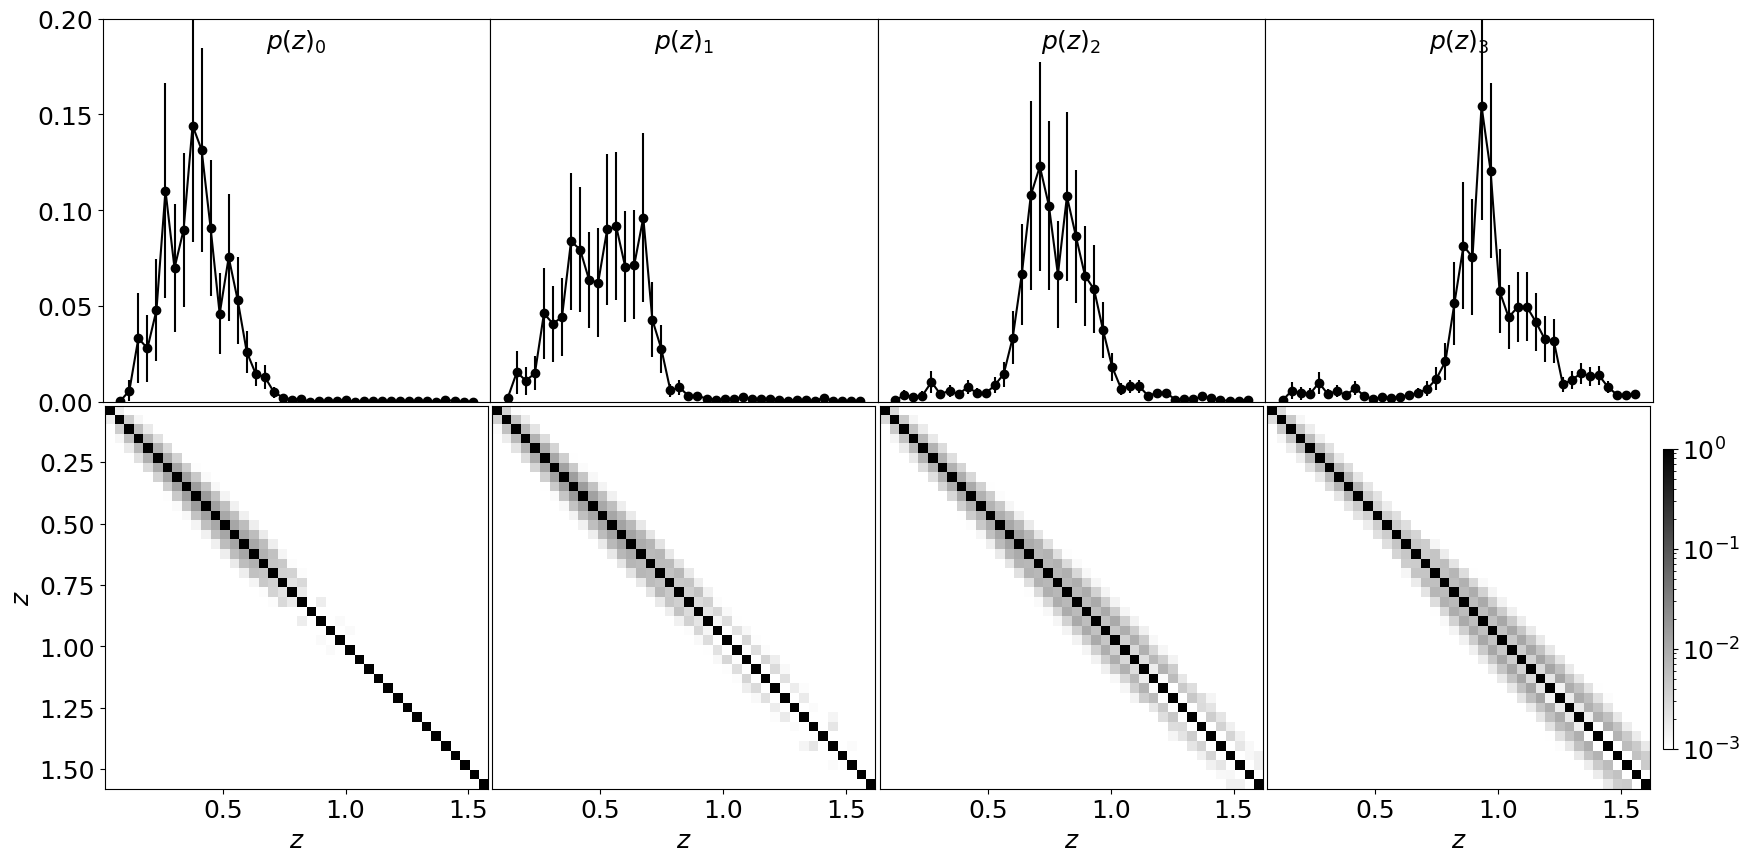

In [38]:
from matplotlib.colors import LogNorm
colorss = ["k", "k", "k", "k"]
figure, axis = plt.subplots(2, 4, figsize=(20,10))
figure.subplots_adjust(wspace=0, hspace=0.01)
for i in range(0, len(nzs_covs.keys())):
    nzzs = nzs["DESY1wl__{}".format(i)]
    axis[0 , i].errorbar(nzzs['z'], nzzs['dndz'],
             yerr=np.sqrt(np.diag(nzzs["cov"])), fmt='{}o-'.format(colorss[i]), label="$DESY1wl_{}$".format(i))
    axis[0, i].set_ylim(0, 0.2)
    axis[0, i].set_title(r"$p(z)_{}$".format(i), y=0.9)
    axis[0, i].set_xticks([])
    if i > 0:
        axis[0, i].set_yticks([])
for i in range(0, len(nzs_covs.keys())):
    cov = list(nzs_covs.keys())[i]
    z = nzs[cov]["z"]
    err = np.sqrt(np.diag(nzs[cov]["cov"]))
    corr = nzs[cov]["cov"] / (np.outer(err, err))
    im = axis[1, i].imshow(abs(corr), cmap='gray_r', norm=LogNorm(vmin=0.001, vmax=1),
                           extent=[min(z), max(z), max(z), min(z)])
    if i > 0:
        axis[1, i].set_yticks([])
    else:
        axis[1, i].set_ylabel(r"$z$")
    axis[1, i].set_xlabel(r"$z$")
cbar_ax = figure.add_axes([0.905, 0.15, 0.005, 0.3])
figure.colorbar(im, cax=cbar_ax)
plt.savefig('/mnt/c/Users/Jaime/Desktop/Nz_paper_plots/original_covs.pdf', bbox_inches='tight',  pad_inches=0)

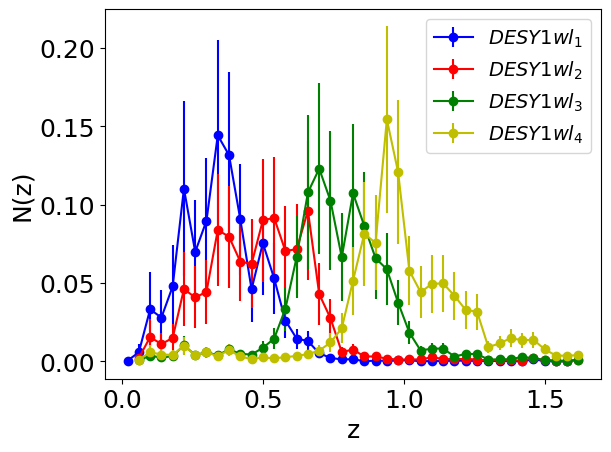

In [39]:
plt.errorbar(nzs["DESY1wl__0"]['z'], nzs["DESY1wl__0"]['dndz'],
             yerr=np.sqrt(np.diag(nzs["DESY1wl__0"]["cov"])), fmt='bo-', label="$DESY1wl_1$")
plt.errorbar(nzs["DESY1wl__1"]['z'], nzs["DESY1wl__1"]['dndz'],
             yerr=np.sqrt(np.diag(nzs["DESY1wl__1"]["cov"])), fmt='ro-', label="$DESY1wl_2$")
plt.errorbar(nzs["DESY1wl__2"]['z'], nzs["DESY1wl__2"]['dndz'],
             yerr=np.sqrt(np.diag(nzs["DESY1wl__2"]["cov"])), fmt='go-', label="$DESY1wl_3$")
plt.errorbar(nzs["DESY1wl__3"]['z'], nzs["DESY1wl__3"]['dndz'],
             yerr=np.sqrt(np.diag(nzs["DESY1wl__3"]["cov"])), fmt='yo-', label="$DESY1wl_4$")
plt.xlabel("z")
plt.ylabel("N(z)")
plt.legend();

plt.savefig('/mnt/c/Users/Jaime/Desktop/Nz_paper_plots/binned_covs.pdf', bbox_inches='tight',  pad_inches=0)

## GCGC case

In [40]:
s = sacc.Sacc().load_fits("/home/jaimerz/PhD/LimberJack.jl/data/FD/cls_FD_covG.fits")
z_DESgc__0 = s.tracers["DESgc__0"].z
dndz_DESgc__0 = s.tracers["DESgc__0"].nz
z_DESgc__1 = s.tracers["DESgc__1"].z
dndz_DESgc__1 = s.tracers["DESgc__1"].nz
z_DESgc__2 = s.tracers["DESgc__2"].z
dndz_DESgc__2 = s.tracers["DESgc__2"].nz
z_DESgc__3 = s.tracers["DESgc__3"].z
dndz_DESgc__3 = s.tracers["DESgc__3"].nz
z_DESgc__4 = s.tracers["DESgc__4"].z
dndz_DESgc__4 = s.tracers["DESgc__4"].nz

nz_DESgc__0 = (z_DESgc__0[5:45], dndz_DESgc__0[5:45] / np.sum(dndz_DESgc__0[5:45]))
nz_DESgc__1 = (z_DESgc__1[20:60], dndz_DESgc__1[20:60] / np.sum(dndz_DESgc__1[20:60]))
nz_DESgc__2 = (z_DESgc__2[30:70], dndz_DESgc__2[30:70] / np.sum(dndz_DESgc__2[30:70]))
nz_DESgc__3 = (z_DESgc__3[50:90], dndz_DESgc__3[50:90] / np.sum(dndz_DESgc__3[50:90]))
nz_DESgc__4 = (z_DESgc__4[65:105], dndz_DESgc__4[65:105] / np.sum(dndz_DESgc__4[65:105]))

In [85]:
cov_DESgc__0 = np.diag((0.1*nz_DESgc__0[1] + 5e-04)**2)
cov_DESgc__1 = np.diag((0.1*nz_DESgc__1[1] + 5e-04)**2)
cov_DESgc__2 = np.diag((0.1*nz_DESgc__2[1] + 5e-04)**2)
cov_DESgc__3 = np.diag((0.1*nz_DESgc__3[1] + 5e-04)**2)
cov_DESgc__4 = np.diag((0.1*nz_DESgc__4[1] + 5e-04)**2)

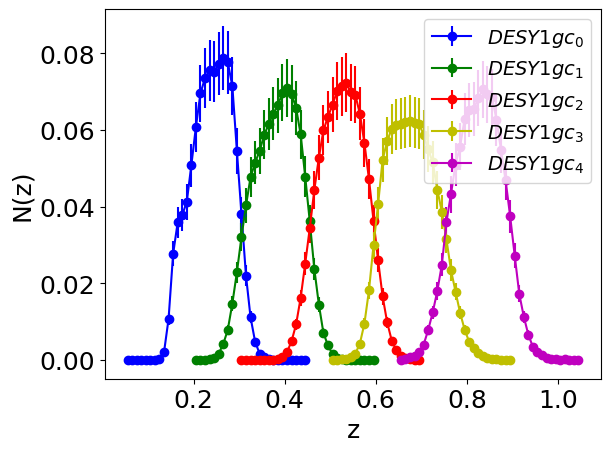

In [86]:
plt.errorbar(nz_DESgc__0[0], nz_DESgc__0[1],
             yerr=np.sqrt(np.diag(cov_DESgc__0)),
             fmt='bo-', label="$DESY1gc_0$")

plt.errorbar(nz_DESgc__1[0], nz_DESgc__1[1],
             yerr=np.sqrt(np.diag(cov_DESgc__1)),
             fmt='go-', label="$DESY1gc_1$")

plt.errorbar(nz_DESgc__2[0],  nz_DESgc__2[1],
             yerr=np.sqrt(np.diag(cov_DESgc__2)),
             fmt='ro-', label="$DESY1gc_2$")

plt.errorbar(nz_DESgc__3[0], nz_DESgc__3[1],
             yerr=np.sqrt(np.diag(cov_DESgc__3)),
             fmt='yo-', label="$DESY1gc_3$")

plt.errorbar(nz_DESgc__4[0], nz_DESgc__4[1],
             yerr=np.sqrt(np.diag(cov_DESgc__4)),
             fmt='mo-', label="$DESY1gc_4$")

plt.xlabel("z")
plt.ylabel("N(z)")
plt.legend();

In [87]:
m = 40
np.savez("/home/jaimerz/Glamdring/LimberJack.jl/data/DESY1/nzs/nz_DESgc__0.npz".format(m),
         z=nz_DESgc__0[0], dndz=nz_DESgc__0[1], cov=cov_DESgc__0)
np.savez("/home/jaimerz/Glamdring/LimberJack.jl/data/DESY1/nzs/nz_DESgc__1.npz".format(m),
         z=nz_DESgc__1[0], dndz=nz_DESgc__1[1], cov=cov_DESgc__1)
np.savez("/home/jaimerz/Glamdring/LimberJack.jl/data/DESY1/nzs/nz_DESgc__2.npz".format(m),
         z=nz_DESgc__2[0], dndz=nz_DESgc__2[1], cov=cov_DESgc__2)
np.savez("/home/jaimerz/Glamdring/LimberJack.jl/data/DESY1/nzs/nz_DESgc__3.npz".format(m),
         z=nz_DESgc__3[0], dndz=nz_DESgc__3[1], cov=cov_DESgc__3)
np.savez("/home/jaimerz/Glamdring/LimberJack.jl/data/DESY1/nzs/nz_DESgc__4.npz".format(m),
         z=nz_DESgc__4[0], dndz=nz_DESgc__4[1], cov=cov_DESgc__4)

In [88]:
nzs = {"DESY1gc__0": np.load("/home/jaimerz/Glamdring/LimberJack.jl/data/DESY1/nzs/nz_DESgc__0.npz"), 
       "DESY1gc__1": np.load("/home/jaimerz/Glamdring/LimberJack.jl/data/DESY1/nzs/nz_DESgc__1.npz"),
       "DESY1gc__2": np.load("/home/jaimerz/Glamdring/LimberJack.jl/data/DESY1/nzs/nz_DESgc__2.npz"),
       "DESY1gc__3": np.load("/home/jaimerz/Glamdring/LimberJack.jl/data/DESY1/nzs/nz_DESgc__3.npz"),
       "DESY1gc__4": np.load("/home/jaimerz/Glamdring/LimberJack.jl/data/DESY1/nzs/nz_DESgc__4.npz")}

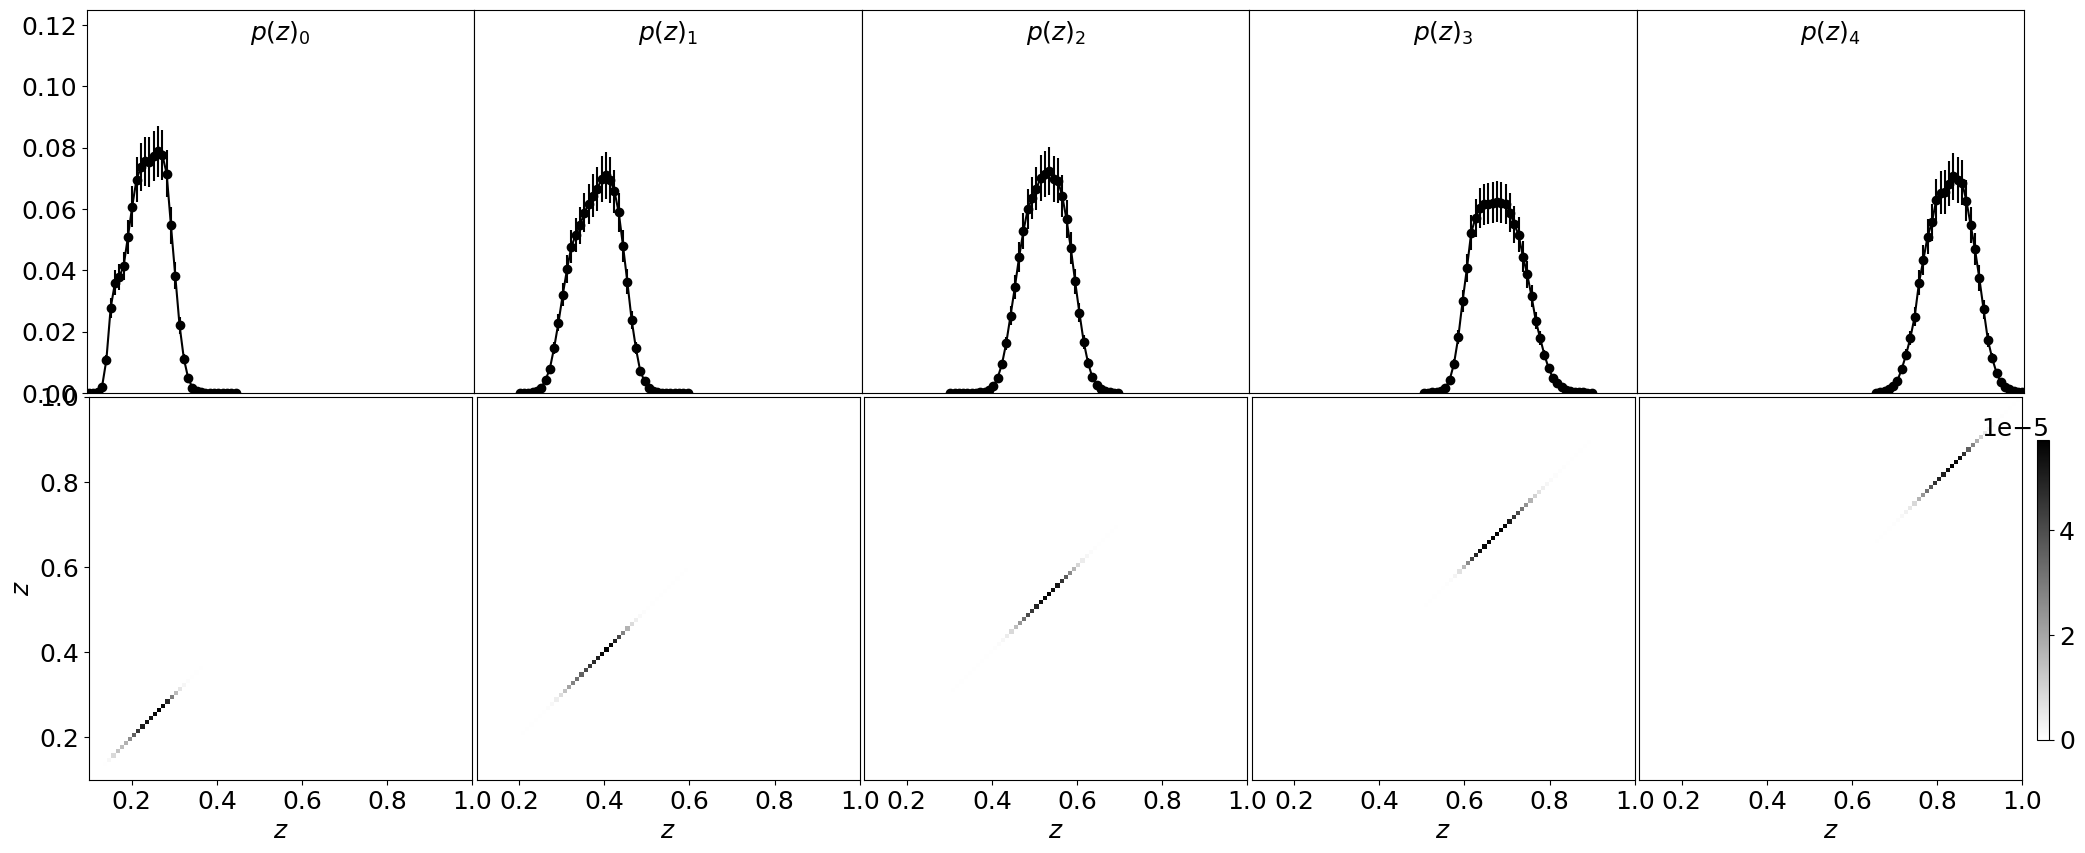

In [89]:
from matplotlib.colors import LogNorm
colorss = ["k", "k", "k", "k", "k"]
figure, axis = plt.subplots(2, 5, figsize=(25,10))
figure.subplots_adjust(wspace=0, hspace=0.01)

for i in range(0, len(nzs.keys())):
    nzzs = nzs["DESY1gc__{}".format(i)]
    axis[0 , i].errorbar(nzzs['z'], nzzs['dndz'],
                         yerr=np.sqrt(np.diag(nzzs["cov"])),
                         fmt='{}o-'.format(colorss[i]),
                         label="$DESY1gc_{}$".format(i))
    axis[0, i].axis(xmin=0.1,xmax=1.0)
    axis[0, i].set_ylim(0, 0.125)
    axis[0, i].set_title(r"$p(z)_{}$".format(i), y=0.9)
    axis[0, i].set_xticks([])
    if i > 0:
        axis[0, i].set_yticks([])
     
for i in range(0, len(nzs.keys())):
    cov = list(nzs.keys())[i]
    z = nzs[cov]["z"]
    err = np.sqrt(np.diag(nzs[cov]["cov"]))
    corr = nzs[cov]["cov"] #/ (np.outer(err, err))
    im = axis[1, i].imshow(abs(corr), cmap='gray_r', #norm=LogNorm(vmin=0.001, vmax=1),
                          extent=[min(z), max(z), max(z), min(z)])   
    if i > 0:
        axis[1, i].set_yticks([])
    else:
        axis[1, i].set_ylabel(r"$z$")
    axis[1, i].axis(xmin=0.1, xmax=1.0, ymin=0.1, ymax=1.0)    
    axis[1, i].set_xlabel(r"$z$")
cbar_ax = figure.add_axes([0.905, 0.15, 0.005, 0.3])
figure.colorbar(im, cax=cbar_ax)

plt.savefig('/mnt/c/Users/Jaime/Desktop/Nz_paper_plots/original_covs.pdf', bbox_inches='tight',  pad_inches=0)